# Compute Gini Index for Real and generated images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Import Libraries

In [2]:
!pip install pygini

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from pygini import gini
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os
import random
import time
import PIL
from IPython.display import HTML
from IPython import display
#from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, Dropout, Input, Dense, Reshape, Flatten
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import adam_v2
import keras
import tensorflow as tf
from keras.backend import sigmoid
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

from numpy import mean
from numpy import var
from numpy import std

In [4]:
import PIL
from keras.preprocessing import image

- Create a function to compute the Gini index.

In [5]:
'''Compute Gini index.
This implementation is inspired by the one found in [1]_.  This
implementation handles multidimensional arrays.
References
----------
.. [1] https://github.com/oliviaguest/gini/blob/master/gini.py
'''



def gini(data, axis=None, eps=1e-8):
    '''Calculate the Gini coefficient of a numpy array.
    Parameters
    ----------
    data : array_like
        Array to compute the Gini index of along axis.
    axis : None or int, optional
        If axis=None, data is flattened before Gini index is computed.
        If axis is int, Gini index will be computed along the
        specified axis.
    eps : float, optional
        Small, positive number to make sure we don't divide by 0.
    Returns
    -------
    res : array_like
        The Gini coefficients of numpy array data.
    Notes
    -----
    Based on bottom eq on [2]_.
    References
    ----------
    .. [2]_ http://www.statsdirect.com/help/
            default.htm#nonparametric_methods/gini.htm
    '''

    # Work out dimensions
    if axis is None:
        data = data.flatten()
        N = data.shape[0]
        idx = np.arange(N) + 1 # 1-based indexing
    else:
        # Move gini index axis up front
        data = np.moveaxis(data, axis, 0)

        # Reshape so we only have two axes to deal with:
        N, sh_orig = data.shape[0], data.shape[1:]
        data = np.reshape(data, (N, -1))
        idx = np.arange(N)[:, None] + 1

    # Values cannot be negative
    minval = np.amin(data.flatten())
    if minval < 0:
        data -= minval

    # Values must be nonzero
    data += eps

    # Values must be sorted
    data = np.sort(data, axis=0)

    # Calculate Gini coefficient
    num = np.sum((2*idx - N - 1)*data, axis=0)
    den = N*np.sum(data, axis=0)
    res = num/den
    if axis is None:
        return res
    return np.reshape(res, sh_orig)

# Load Input data

In [6]:
data = "/content/drive/MyDrive/RealImages/"

In [7]:
#Convert to numpy array
def readImage(path,image_size=(256,256)):
    img = np.asarray(PIL.Image.open(path).resize(image_size))
    img = ((img - 127.5) / 127.5).astype("float32")
    return img

- We create a list of Gini indices for real images 

In [8]:
gini_real=[]
images =os.listdir(data)[:63]
for i in images:
    image_path=os.path.join(data, i)
    ginireal = gini(readImage(image_path))
    gini_real.append(ginireal)

In [9]:
gini_real

[0.5681862545408235,
 0.49315052429155076,
 0.5133306617830568,
 0.696106860423034,
 0.6381790934508422,
 0.6573362831753679,
 0.5223668569676083,
 0.44933789831850107,
 0.7441298001393424,
 0.6066311100289008,
 0.6006080253087924,
 0.5464877280636702,
 0.5964858037580095,
 0.48128639519711963,
 0.7055312349220889,
 0.7076744556906553,
 0.5629484425896417,
 0.5648781849974758,
 0.6341904747722928,
 0.5722292504101646,
 0.5740902776363023,
 0.6335608897955233,
 0.5965008773650751,
 0.6583876592901129,
 0.4170719833975471,
 0.5447070469900955,
 0.5242498152631259,
 0.4903020715544401,
 0.732535635862174,
 0.5497823729595069,
 0.47875935952341253,
 0.5943812442317556,
 0.6638432738062071,
 0.6584755543114439,
 0.5381981668450355,
 0.5618709633878813,
 0.6120234287540496,
 0.7183271264079768,
 0.4541155514316675,
 0.5209855225478185,
 0.5808289573165333,
 0.633569309617529,
 0.4725787238760929,
 0.6546115262422527,
 0.6940990458019903,
 0.6377686106488482,
 0.6671537481762986,
 0.523407857

# Plot histogram for input (real images) gini indices

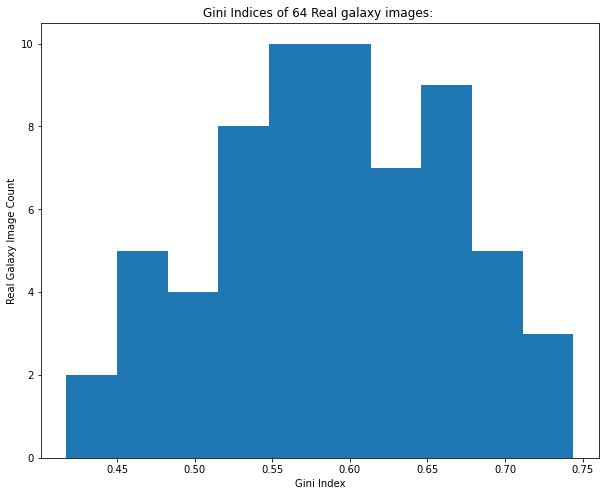

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,8))
plt.hist(gini_real)
plt.xlabel(f"Gini Index")
plt.ylabel(f"Real Galaxy Image Count")
plt.title(f"Gini Indices of 64 Real galaxy images: ")
plt.show();

# Load generated images

In [11]:
data2 = "/content/drive/MyDrive/genrated/"

In [12]:
#Convert to numpy array
def readImage(path,image_size=(256,256)):
    img2 = np.asarray(PIL.Image.open(path).resize(image_size))
    
    img2 = ((img2 - 127.5) / 127.5).astype("float32")
    return img2

- We create a list of Gini indices for generated galaxy images 

In [13]:
gini_generated=[]
img2 =os.listdir(data2)[:63]
for i in img2:
    image_path=os.path.join(data2, i)
    ginigenerated = gini(readImage(image_path))
    gini_generated.append(ginigenerated)

In [14]:
gini_generated

[0.5277669589760388,
 0.418585392845321,
 0.45802441251763715,
 0.40407090355293107,
 0.39810793996669175,
 0.4881990868180447,
 0.5012595711014592,
 0.45860173319307823,
 0.2789734884003762,
 0.45544646917501014,
 0.4591626150244145,
 0.4398540910805907,
 0.36340417155300764,
 0.4904254180075271,
 0.4097706078248147,
 0.39796596572832676,
 0.39583811524203666,
 0.39793770122488026,
 0.41257383678676507,
 0.5103486926046149,
 0.3671378555536387,
 0.39939378746017756,
 0.3576032165152784,
 0.36635104819966186,
 0.5594974152477938,
 0.43857707756555303,
 0.3797594687692639,
 0.5063496314496349,
 0.36995791166557573,
 0.44560101380304135,
 0.4835867629411273,
 0.357000101448795,
 0.47159903544920545,
 0.41149205610011236,
 0.3225731008349304,
 0.39745229484419253,
 0.5056802546450097,
 0.3626129809099701,
 0.35637849255834403,
 0.37432636717550305,
 0.40229000292081596,
 0.5028583458702913,
 0.3749481019498228,
 0.5269712544385408,
 0.45166647162554824,
 0.4054143622600453,
 0.42626440226

# Plot histogram for generated gini indices

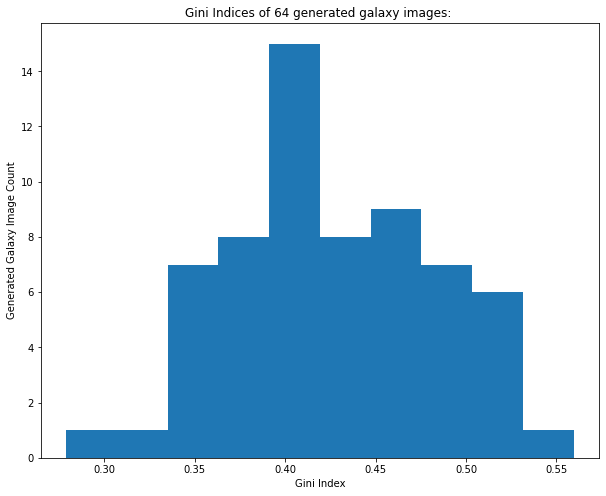

In [15]:
plt.figure(figsize=(10,8))
plt.hist(gini_generated)
plt.xlabel(f"Gini Index")
plt.ylabel(f"Generated Galaxy Image Count")
plt.title(f"Gini Indices of 64 generated galaxy images: ")
plt.show();

- To compare Gini index of Real and Generated images, we put them together in a DataFrame

In [16]:
dfg = pd.DataFrame(list(zip(gini_real, gini_generated)),
                  columns = ['Gini_real','Gini_generated'])

In [17]:
dfg

,Gini_real,Gini_generated
0,0.568186,0.527767
1,0.493151,0.418585
2,0.513331,0.458024
3,0.696107,0.404071
4,0.638179,0.398108
...,...,...
58,0.469021,0.471827
59,0.619882,0.442439
60,0.497362,0.337059
61,0.652222,0.422848


# Visualization of Gini Index for Real and Generated images

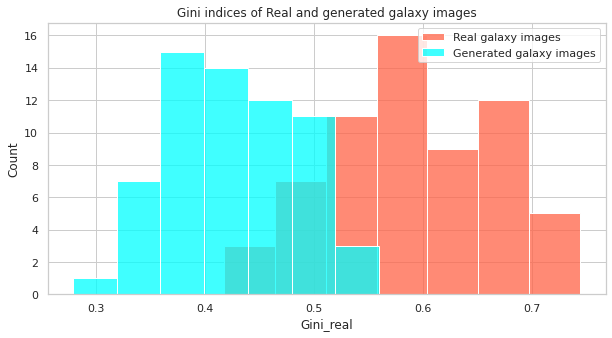

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(data=dfg, x="Gini_real", color="tomato", label="Real galaxy images", kde=False)
sns.histplot(data=dfg, x="Gini_generated", color="cyan", label="Generated galaxy images", kde=False)

plt.title("Gini indices of Real and generated galaxy images")
plt.legend() 
plt.show()

- The above histogram shows the Gini index of real and generated galaxies overlapping between 0.42 and 0.56.
- Gini index below 0.42 were recorded from generated images only.
- Gini index above 0.56 were obtained from real images only.

- Next, we will carry out an hypothesis test to compare the Gini mean values of the real with the Gini mean values of the generated galaxy images.

# Hypothesis Test

- We carry out hypothesis testing on the gini indices of real & generated images

In [19]:
#https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
from scipy.stats import ttest_ind
import numpy as np

gini_real_mean = np.mean(gini_real)
gini_generated_mean = np.mean(gini_generated)
print("Gini_real mean value: {:.4f}".format(gini_real_mean))
print("Gini_generated mean value: {:.4f}".format(gini_generated_mean))
gini_real_std = np.std(gini_real)
gini_generated_std = np.std(gini_generated)
print("Gini_real std value: {:.4f}".format(gini_real_std))
print("Gini_generated std value : {:.4f}".format(gini_generated_std))
ttest,pval = ttest_ind(dfg['Gini_real'], dfg['Gini_generated'])
print("p-value",pval)
if pval <0.05:
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")


Gini_real mean value: 0.5890
Gini_generated mean value: 0.4252
Gini_real std value: 0.0761
Gini_generated std value : 0.0573
p-value 3.3944546060350494e-26
We reject null hypothesis


- The two hypotheses for this particular paired samples t-test are as follows:

- H0: µ1 = µ2 (the mean of real galaxy gini indices and the mean of generated galaxy gini indices are equal)
- HA: µ1 ≠ µ2 (the mean of real galaxy gini indices and the mean of generated galaxy gini indices are not equal)
- Since the p-value of the test (3.3944546060350494e-26) is less than 0.05, we reject the null hypothesis.

- This means we have sufficient evidence to say that the mean of real gini and the mean of generated gini is not equal.

# Smoothness for Real Images.

In [20]:
#Create a Function to derive the smoothness of the Real Images
def smoothness(data):
    data = cv2.imread(data)
    data = cv2.cvtColor(np.float32(data), cv2.COLOR_RGB2GRAY)
    blur= cv2.GaussianBlur(data,(7,7),0)
    np.seterr(all='ignore')
    s=(data-blur)
    s=np.divide(s, data, out=np.zeros_like(s), where=data!=0)
    s[s == np.inf] = 0
    s=np.absolute(s).sum()
    return s    

In [21]:
#Convert to numpy array
def readImage(path,image_size=(256,256)):
    img = np.asarray(PIL.Image.open(path).resize(image_size))
    img = ((img - 127.5) / 127.5).astype("float32")
    return img

In [22]:
datar = "/content/drive/MyDrive/RealImages/"

In [23]:
#We create a list of smoothness coeffecients for real images 
sListReal=[]
imgList=os.listdir(datar)[:63]
for i in imgList:
    imgPath=os.path.join(datar, i)
    sRcoeff=smoothness(imgPath)
    sListReal.append(sRcoeff)

In [24]:
sListReal

[1629.266,
 1021.0224,
 1226.0696,
 1813.5667,
 2002.5325,
 2582.69,
 1210.8829,
 1229.7908,
 2178.792,
 1467.1921,
 1695.574,
 1579.6355,
 1274.2288,
 1311.1361,
 2449.2573,
 2074.1206,
 1161.9905,
 1248.2815,
 2085.5347,
 1498.5112,
 1491.4069,
 2411.4692,
 1784.0916,
 2128.592,
 926.9121,
 1658.1895,
 836.3319,
 1285.515,
 1889.2544,
 1990.8933,
 1471.5791,
 1196.4017,
 1808.7639,
 1854.6833,
 1474.7173,
 1284.7102,
 2208.528,
 1871.8254,
 1429.6606,
 1019.7666,
 1251.0527,
 1735.7441,
 1400.5581,
 1956.5544,
 2183.9883,
 1147.5492,
 1972.6433,
 1313.2135,
 1909.2925,
 1498.5815,
 1805.4995,
 1569.3904,
 1789.9387,
 1298.0986,
 1465.0747,
 2408.6655,
 1510.829,
 2045.4104,
 1287.0829,
 2084.287,
 1204.232,
 1259.2437,
 967.1635]

In [25]:
#We create an explicit function to normalize array
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

# assign array and range
array_1d = sListReal
range_to_normalize = (0, 1)
sListNormReal = normalized_array_1d = normalize(
    array_1d, range_to_normalize[0],
range_to_normalize[1])

# display the normalized array
print("Real Normalized Array = ", normalized_array_1d)


Real Normalized Array =  [0.45405012454420873, 0.10575751782535711, 0.22317168856922873, 0.5595844169279468, 0.6677900751179648, 1.0, 0.21447550758711367, 0.22530251818009928, 0.7687198491000209, 0.36124335207933084, 0.4920194195998718, 0.42563069837374307, 0.2507486108261718, 0.2718825065976801, 0.923593779325207, 0.7087828918511705, 0.18647869642213688, 0.23589068069604957, 0.7153188153498858, 0.3791772987379916, 0.37510919243556884, 0.9019555555244889, 0.5427063786835955, 0.7399743397339539, 0.0518680582811676, 0.470612284983432, 0.0, 0.25721134909320564, 0.602924753069743, 0.6611252561395734, 0.3637554159343192, 0.20618327832790967, 0.5568342738952053, 0.5831286721493846, 0.3655524034568314, 0.25675049882340933, 0.7857473334048642, 0.5929445801862344, 0.3397520579414539, 0.10503842224663283, 0.237477549014708, 0.5150216707272703, 0.32308735429795477, 0.6414621248951065, 0.7716953495223913, 0.17820932444159562, 0.650674936294947, 0.27307206368722853, 0.6143989671585641, 0.3792175611

- Visualize the smoothness coefficients for Real images.

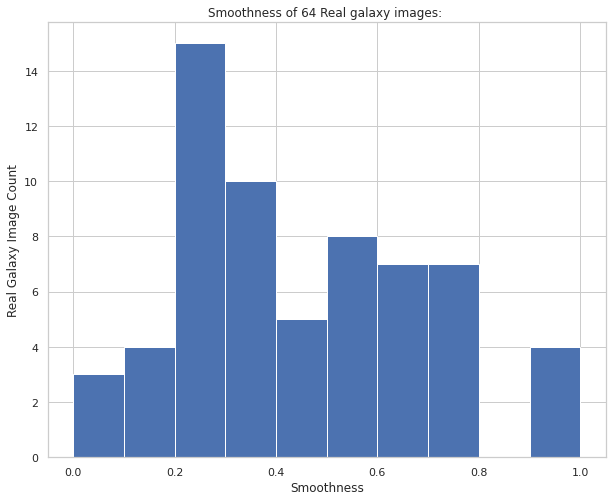

In [26]:
plt.figure(figsize=(10,8))
plt.hist(sListNormReal)
plt.xlabel(f"Smoothness")
plt.ylabel(f"Real Galaxy Image Count")
plt.title(f"Smoothness of 64 Real galaxy images: ")
plt.show();

- The histogram above shows that more real images recorded smoothness coefficient of 0.5 and above than below.

# Smoothness for Generated images.

In [27]:
datag = "/content/drive/MyDrive/genrated/"

In [28]:
#Create a Function to derive the smoothness of generated images
def smoothness(datag):
    datag = cv2.imread(datag)
    datag = cv2.cvtColor(np.float32(datag), cv2.COLOR_RGB2GRAY)
    blur= cv2.GaussianBlur(datag,(7,7),0)
    np.seterr(all='ignore')
    s=(datag-blur)
    s=np.divide(s, datag, out=np.zeros_like(s), where=datag!=0)
    s[s == np.inf] = 0
    s=np.absolute(s).sum()
    return s    

In [29]:
#We create a list of smoothness coeffecients for generated images 
sListGenrated=[]
imgList=os.listdir(datag)[:63]
for i in imgList:
    imgPath=os.path.join(datag, i)
    sGcoeff=smoothness(imgPath)
    sListGenrated.append(sGcoeff)

In [30]:
sListGenrated

[380.60757,
 415.86115,
 331.56836,
 402.3117,
 305.83035,
 400.82837,
 363.52472,
 433.81818,
 407.4519,
 391.25955,
 331.68945,
 357.7861,
 395.78418,
 410.0108,
 459.86823,
 300.62598,
 457.35974,
 400.5046,
 375.36536,
 429.30737,
 383.24292,
 336.11267,
 443.46198,
 401.86688,
 428.17273,
 400.50763,
 314.5416,
 400.59268,
 321.9387,
 341.8076,
 381.5263,
 380.70413,
 336.5498,
 320.98065,
 356.3243,
 421.13574,
 431.699,
 418.6781,
 288.96368,
 356.97052,
 500.74725,
 431.46094,
 345.76495,
 243.56216,
 337.74475,
 365.75934,
 331.39444,
 414.73517,
 417.7129,
 340.15082,
 334.89636,
 413.64456,
 392.20703,
 399.02643,
 298.6324,
 392.4326,
 326.11182,
 371.05072,
 376.59872,
 325.0004,
 398.9673,
 411.78058,
 351.31088]

In [31]:
# create explicit function to normalize array
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

# assign array and range
array_1d = sListGenrated
range_to_normalize = (0, 1)
sListNormGenrated = normalized_array_1d = normalize(
    array_1d, range_to_normalize[0],
range_to_normalize[1])

# display the generated normalized array
print("Generated Normalized Array = ", normalized_array_1d)


Generated Normalized Array =  [0.5328668572108662, 0.6699415635185105, 0.34219011441314157, 0.6172579552915292, 0.24211430255044206, 0.6114903681912457, 0.4664444402517917, 0.7397629956709278, 0.6372443307523601, 0.5742844120771655, 0.3426609572229577, 0.4441312611977942, 0.5918772970347701, 0.6471939702692668, 0.8410521058527731, 0.2218783851468079, 0.8312984926266467, 0.610231504438892, 0.5124838014291646, 0.7222238636853109, 0.5431137399834659, 0.3598595350593377, 0.77726049936155, 0.6155283673893416, 0.7178120855429305, 0.6102432517771409, 0.27598579450155747, 0.6105739571478459, 0.30474755029433015, 0.3820027930186637, 0.5364391159783853, 0.5332422973949031, 0.36155922064598256, 0.3010224574695925, 0.4384474480450234, 0.6904505175414458, 0.7315231278391625, 0.6808945918458521, 0.17653247290606958, 0.4409600731704915, 1.0, 0.7305974613171424, 0.3973900262250427, 0.0, 0.3662054709134125, 0.4751331987966454, 0.3415138711739424, 0.6655634848111069, 0.6771416139252711, 0.37556086123889

- Visualize smoothness for Generated images.

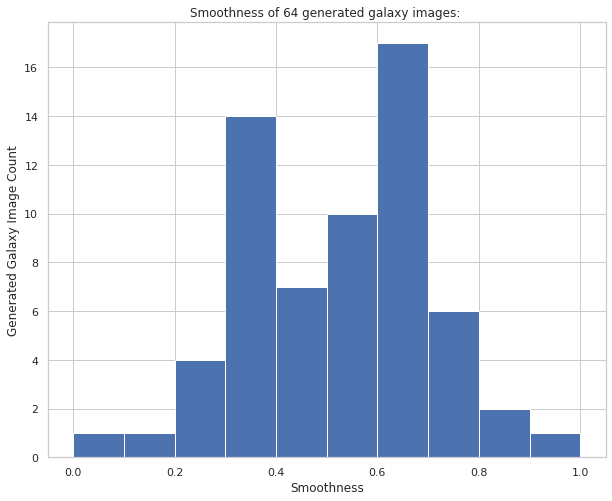

In [32]:
plt.figure(figsize=(10,8))
plt.hist(sListNormGenrated)
plt.xlabel(f"Smoothness")
plt.ylabel(f"Generated Galaxy Image Count")
plt.title(f"Smoothness of 64 generated galaxy images: ")
plt.show();

- The histogram above shows that more generated images recorded smoothness coefficient of 0.5 and above than below, similar to the real images.

- To compare the smoothness of real images with fake images, we put them together in a DataFrame.

In [33]:
df1 = pd.DataFrame(list(zip(sListNormReal,sListNormGenrated)),
                  columns = ['Smoothness_Real','Smoothness_Generated'])

In [34]:
df1

,Smoothness_Real,Smoothness_Generated
0,0.454050,0.532867
1,0.105758,0.669942
2,0.223172,0.342190
3,0.559584,0.617258
4,0.667790,0.242114
...,...,...
58,0.258109,0.517279
59,0.714604,0.316652
60,0.210667,0.604254
61,0.242168,0.654075


- VISUALIZING SMOOTHNESS COEFFICIENT OF REAL AND GENERATED IMAGES.

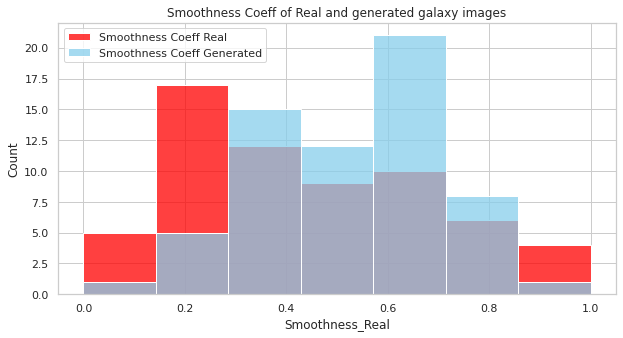

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(data=df1, x="Smoothness_Real", color="red", label="Smoothness Coeff Real", kde=False)
sns.histplot(data=df1, x="Smoothness_Generated", color="skyblue", label="Smoothness Coeff Generated", kde=False)

plt.title("Smoothness Coeff of Real and generated galaxy images")
plt.legend() 
plt.show()

- The above histogram shows the smoothness coefficient of real and generated galaxies overlapping all through from 0 to 1.

- Next, we will carry out an hypothesis test to compare the smoothness mean values of the real with the smoothness mean values of the generated galaxy images.

# Hypothesis Test for Smoothness

In [36]:
#https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

sListNormReal_mean = np.mean(sListNormReal)
sListNormGenrated_mean = np.mean(sListNormGenrated)
print("Smoothness_real mean value: {:.4f}".format(sListNormReal_mean))
print("Smoothness_generated mean value: {:.4f}".format(sListNormGenrated_mean))
sListNormReal_std = np.std(sListNormReal)
sListNormGenrated_std = np.std(sListNormGenrated)
print("Smoothness_real std value: {:.4f}".format(sListNormReal_std))
print("Smoothness_generated std value : {:.4f}".format(sListNormGenrated_std))
ttest,pval = ttest_ind(df1['Smoothness_Real'], df1['Smoothness_Generated'])
print("p-value",pval)
if pval <0.05:
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")


Smoothness_real mean value: 0.4466
Smoothness_generated mean value: 0.5180
Smoothness_real std value: 0.2369
Smoothness_generated std value : 0.1850
p-value 0.06380153230215922
We accept null hypothesis


- The two hypotheses for this particular paired samples t-test are as follows:

- H0: µ1 = µ2 (the mean of real galaxy smoothness and the mean of generated galaxy smoothness are equal)

- HA: µ1 ≠ µ2 (the mean of real galaxy smoothness and the mean of generated galaxy smoothness are not equal)

- Since the p-value of the test (0.06380153230215922) is greater than 0.05, we accept the null hypothesis.


- This means we have sufficient evidence to say that the mean of real galaxy smoothness and the mean of generated galaxy smoothness are equal.

- We can infer from the above that the artificial galaxy images have the same smoothness as the real galaxies.